<a href="https://colab.research.google.com/github/06-pooja/Yes_Bank_Stock_Price_closing_prediction/blob/main/Personal_Colab_Regression_Analysis_Yes_Bank_Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Capstone Project - Yes Bank Stock Closing Price Prediction**

## **(Supervised - Regression)**

147272-yes-bank-share-price-reuters.avif

#**Project summary**


#Yes Bank is a well-known financial institution in the Indian domain. Since 2018, it has consistently made headlines due to fluctuations in its stock prices attributed to events involving the company's founder, Rana Kapoor. Given this context, there is a significant interest in assessing how such occurrences impact the bank's stock prices and whether predictive models, including time series methods, can effectively address such situations.

#The dataset at hand encompasses monthly stock price records of Yes Bank since its inception. It covers a range of metrics, including monthly closing, opening, highest, and lowest stock prices. The primary aim of this project is to construct models capable of predicting the closing price of the bank's stock for a given month.

#This project carries a pivotal significance, as accurately predicting Yes Bank's stock prices is a crucial task for a multitude of stakeholders, investors, and market participants. Yes Bank's prominence in the private sector banking industry in India has been coupled with challenges like high levels of non-performing assets and involvement in fraudulent activities. These challenges have prompted regulatory intervention by the Reserve Bank of India, rendering the prediction of Yes Bank's stock prices intricate and uncertain.

#To address this intricate challenge, the project harnesses a comprehensive dataset spanning from the inception of the bank. It aims to develop predictive models that adeptly capture the nuanced dynamics and trends in Yes Bank's stock prices, while accounting for the unpredictable events and market turbulence tied to the bank's performance.

#The project methodology entails the deployment of a diverse array of modeling techniques. The objective is to rigorously evaluate the performance of these models in accurately forecasting the closing price of Yes Bank's stock. Furthermore, the efficacy of the models lies in their capacity to incorporate the impact of significant events, such as instances of fraud involving the bank's founders or regulatory interventions by the Reserve Bank of India.

#By successfully accomplishing the prediction of Yes Bank's stock closing prices, this project stands to provide invaluable insights. These insights can significantly aid stakeholders in making well-informed decisions related to their investments in the bank. The project's broader purpose is to navigate the intricate landscape of Yes Bank's stock prices, unravel the complexities inherent in its financial performance, and ultimately empower decision-makers with the tools for sound judgment

#**Data Science Problem Statement**
---
#Perform regression analysis using multiple models to predict the closing price of the stock and compare the evaluation metrics for all of them to find the best model.



#**Github link-**  

## **Pooja Bramhavanshi -**

# **1. Know YOur Data**

##**Importing Libraries**

In [1]:
# importing the required libraries

import warnings    # do not disturb mode
warnings.filterwarnings('ignore')


import numpy as np   # numerical computations
import pandas as pd  # Data Manupulation

import matplotlib.pyplot as plt  # visualize with plots
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

import scipy.stats as stats   # statistics

from datetime import datetime   # to convert to date

from sklearn.model_selection import train_test_split   # split train and test data

from sklearn.compose import ColumnTransformer #  transformation

from sklearn.preprocessing import StandardScaler,MinMaxScaler # scale the data

from sklearn.preprocessing import FunctionTransformer,PowerTransformer

from sklearn.preprocessing import PolynomialFeatures  #Higher-Dimensional

from sklearn.linear_model import LinearRegression,Ridge,ElasticNet,Lasso # regression model

from sklearn.model_selection import GridSearchCV, cross_val_score # hyperparameters tunning

from sklearn.pipeline import Pipeline  # creating pipeline
from sklearn.pipeline import make_pipeline  # make pipeline

from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score,accuracy_score # import required metrics
#from sklearn.model_selection import cross_val_score


## **Dataset Loading**

In [2]:
# Mounting Drive
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [3]:
# Defining file path
file_path =('/content/drive/MyDrive/Almabetter/Capstone/Regression/data_YesBank_StockPrices.csv')
df=pd.read_csv(file_path)

##**Dataset FirstView**

In [4]:
# Dataset First Look
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [5]:
# Dataset last five row look
df.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


## **Dataset Rows and Columns Count**

In [6]:
# Dataset Rows & Columns count
print(f'There are total {df.shape[0]} rows and {df.shape[1]} columns.')

There are total 185 rows and 5 columns.


## **Dataset Information**

In [7]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


## **Duplicate Values**

In [8]:
# Dataset Duplicate Value Count
No_of_duplicate_rows=df[df.duplicated()].shape[0]
print(f'we hve total no {No_of_duplicate_rows} duplicate rows.')

we hve total no 0 duplicate rows.


## **Missing Values/ Null Values**

In [9]:
# Missing Values/Null Values Count
df.isna().sum().sort_values(ascending=False).reset_index().rename(columns = {'index':'columns',0:'null values'})

,columns,null values
0,Date,0
1,Open,0
2,High,0
3,Low,0
4,Close,0


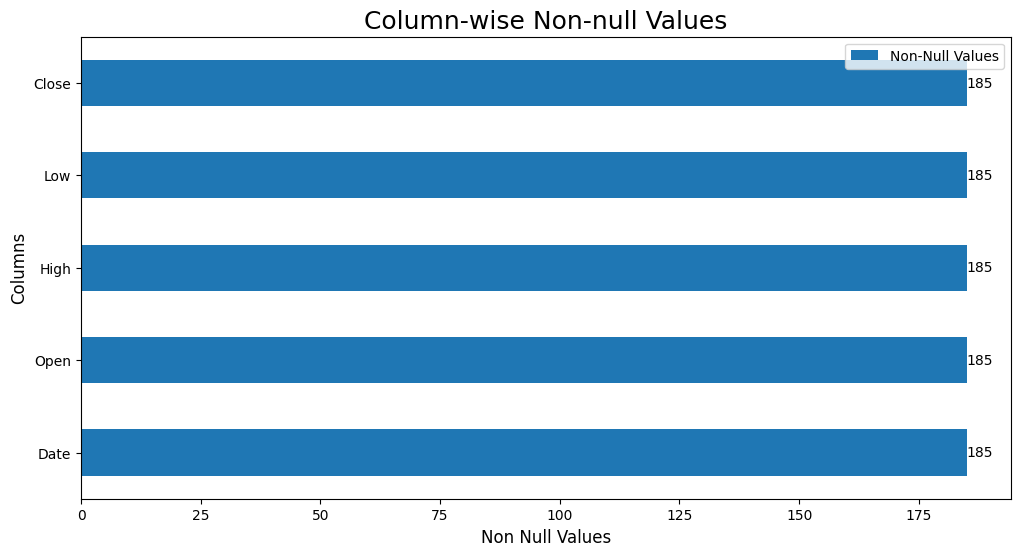

In [10]:
# Visualization of Non-null Values

non_null_values = df.notnull().sum().reset_index().rename(columns = {'index' : 'columns', 0 : "Non-Null Values"})

ax = non_null_values.plot(kind = 'barh', x = 'columns', figsize=(12,6))
ax.bar_label(ax.containers[0])
plt.ylabel('Columns', {'fontsize': 12, 'fontweight': 15})
plt.xlabel("Non Null Values", {'fontsize': 12, 'fontweight': 15})
plt.title('Column-wise Non-null Values',{'fontsize': 18, 'fontweight': 20})
plt.show()

## **What did you know about your dataset?**

* We have no null values
* Date column is of 'object' datatype we have to convert it to 'datetime'.
* Data type of Open, High, Low, Close columns are 'float64' we have to convert it into 'integer'.
* We have no duplicate values which makes the dataset easier to work with.

# **2. Understanding Your Variables**

## **Dataset Columns and Description**

In [11]:
# Dataset Columns
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [12]:
# Dataset Describe
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


## **Unique values**

In [13]:
# Check Unique Values for each variable.
def unique_values(df):
    unique_vals = []
    for col in df.columns:
        unique_vals.append(df[col].unique())

    return unique_vals

In [14]:
unique_values(df)

[array(['Jul-05', 'Aug-05', 'Sep-05', 'Oct-05', 'Nov-05', 'Dec-05',
        'Jan-06', 'Feb-06', 'Mar-06', 'Apr-06', 'May-06', 'Jun-06',
        'Jul-06', 'Aug-06', 'Sep-06', 'Oct-06', 'Nov-06', 'Dec-06',
        'Jan-07', 'Feb-07', 'Mar-07', 'Apr-07', 'May-07', 'Jun-07',
        'Jul-07', 'Aug-07', 'Sep-07', 'Oct-07', 'Nov-07', 'Dec-07',
        'Jan-08', 'Feb-08', 'Mar-08', 'Apr-08', 'May-08', 'Jun-08',
        'Jul-08', 'Aug-08', 'Sep-08', 'Oct-08', 'Nov-08', 'Dec-08',
        'Jan-09', 'Feb-09', 'Mar-09', 'Apr-09', 'May-09', 'Jun-09',
        'Jul-09', 'Aug-09', 'Sep-09', 'Oct-09', 'Nov-09', 'Dec-09',
        'Jan-10', 'Feb-10', 'Mar-10', 'Apr-10', 'May-10', 'Jun-10',
        'Jul-10', 'Aug-10', 'Sep-10', 'Oct-10', 'Nov-10', 'Dec-10',
        'Jan-11', 'Feb-11', 'Mar-11', 'Apr-11', 'May-11', 'Jun-11',
        'Jul-11', 'Aug-11', 'Sep-11', 'Oct-11', 'Nov-11', 'Dec-11',
        'Jan-12', 'Feb-12', 'Mar-12', 'Apr-12', 'May-12', 'Jun-12',
        'Jul-12', 'Aug-12', 'Sep-12', 'Oct-12', 

## **What do you understand from the variables?**

We can see here that the std, mean, median, 50%, 25%, 75%, 100%, min and max values for open and closing price is almost similar and it might be due the the fact that the opening stock price of any day will be almost equal to the cloing price of the previous day.

# **3. Data Wrangling**

* We don't have to do any further data manipulation as the data is already in workable state and it does not require any changes.

## **ML Model : Elasticnet Regression**

### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# ML Model- 4: Elastic Net Regression

# Implementation of Elastic Net
trf6 = ElasticNet(l1_ratio=0.5)

In [ ]:
# Create the pipeline for Elastic Net Regression

elastic_net = make_pipeline( trf1, trf6)

In [ ]:
# Fit the training datasets into the pipeline
elastic_net.fit(X_train, Y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 5, None))])),
                ('elasticnet', ElasticNet())])

In [ ]:
# Predict the test dataset
elasticnet_pred = elastic_net.predict(X_test)

In [ ]:
# Check the test and train accuracy
elasticnet_train_accuracy = round(elastic_net.score(X_train,Y_train), 4)
elasticnet_test_accuracy = round(elastic_net.score(X_test,Y_test), 4)
elasticnet_cross_val= round(cross_val_score(elastic_net,X_train,Y_train,cv=10).mean(), 4)

In [ ]:
#print train and test accuracy score
print('train_accuracy',elasticnet_train_accuracy)
print('test_accuracy', elasticnet_test_accuracy)
print('cross_val',elasticnet_cross_val)

train_accuracy 0.5898
test_accuracy 0.5877
cross_val 0.5189


In [ ]:
# Evaluate the metrics
elasticnet_MAE = round(mean_absolute_error(Y_test,elasticnet_pred), 4)
print("MAE :" ,elasticnet_MAE)

elasticnet_MSE  = round(mean_squared_error(Y_test,elasticnet_pred), 4)
print("MSE :" , elasticnet_MSE)

elasticnet_RMSE = round(np.sqrt(elasticnet_MSE), 4)
print("RMSE :" ,elasticnet_RMSE)

elasticnet_R2_score = round(r2_score(Y_test,elasticnet_pred), 4)
print('R2_score:',elasticnet_R2_score)

elasticnet_Adj_r2 = round(1-(1-r2_score(Y_test, elasticnet_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)), 4)
print("Adjusted R2 : ", elasticnet_Adj_r2)

MAE : 51.1351
MSE : 3728.1351
RMSE : 61.0585
R2_score: 0.5877
Adjusted R2 :  0.5361


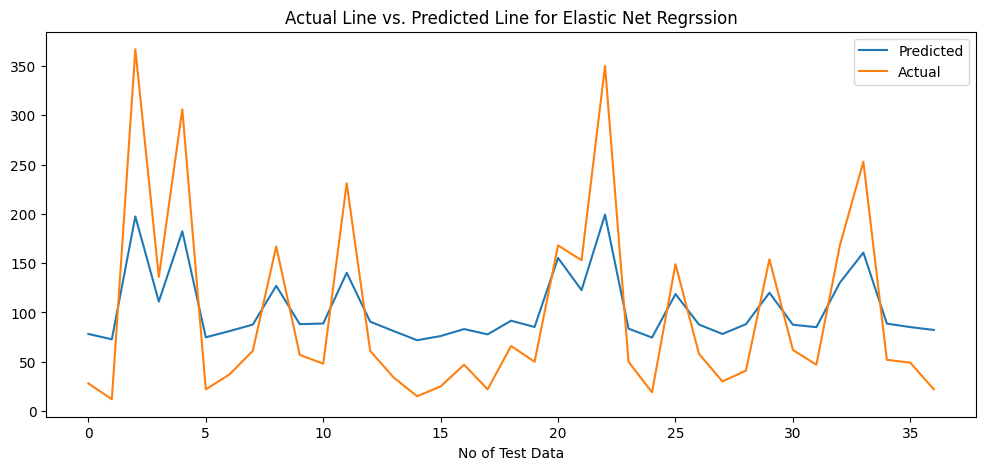

In [ ]:
# Visualizing evaluation Metric Score chart
plt.figure(figsize=(12,5))  # Set the figure size
plt.plot(elasticnet_pred)   # plot the prediction
plt.plot(np.array(Y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')  # set X-axis lable
plt.title('Actual Line vs. Predicted Line for Elastic Net Regrssion') # set plot title
plt.show()                                  # figure display

### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Define the log transformer
def log_transform(X):
    return np.log1p(X)

In [ ]:
# Create a pipeline with preprocessing and the model
pipeline2 = Pipeline([
    ('scaler', MinMaxScaler()),  # Min-Max scaling
    ('log_transform', FunctionTransformer()),  # Logarithmic transform
    ('poly_features', PolynomialFeatures()),  # Polynomial features
    ('model',ElasticNet())  # Ridge regression model
])

In [ ]:
# Defining the hyper parameter grid
param_grid2 = {

    'poly_features__degree': [2, 3, 4, 5, 6, 8],  # Degree of polynomial features
    'scaler__feature_range': [(0, 1), (0, 2)],  # MinMaxScaler's feature_range
    'log_transform__func': [np.log1p, np.log, np.log10], # Transformation function choices
    'model__alpha':[1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100] , #  regularization strength
    'model__l1_ratio': [ 0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.9]  #  L1 ratio
}

In [ ]:
# Perform Hyperparameter Tuning with GridSearchCV
grid_search2 = GridSearchCV(pipeline2, param_grid=param_grid2, cv= 5, scoring='neg_mean_squared_error')
grid_search2.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('log_transform', FunctionTransformer()),
                                       ('poly_features', PolynomialFeatures()),
                                       ('model', ElasticNet())]),
             param_grid={'log_transform__func': [<ufunc 'log1p'>, <ufunc 'log'>,
                                                 <ufunc 'log10'>],
                         'model__alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001,
                                          0.001, 0.01, 1, 5, 10, 20, 30, 40, 45,
                                          50, 55, 60, 100],
                         'model__l1_ratio': [0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6,
                                             0.7, 0.75, 0.8, 0.9],
                         'poly_features__degree': [2, 3, 4, 5, 6, 8],
                         'scaler__feature_range': [(0, 1), (0, 2)]},
             scoring='neg_mean_squared_error')

In [ ]:
# Print the best hyperparameters and evaluate the model
print("Best Hyperparameters:", grid_search2.best_params_)
best_model2 = grid_search2.best_estimator_


Best Hyperparameters: {'log_transform__func': <ufunc 'log1p'>, 'model__alpha': 0.0001, 'model__l1_ratio': 0.25, 'poly_features__degree': 8, 'scaler__feature_range': (0, 1)}


In [ ]:
#make prediction
ElasticNet_pred = best_model2.predict(X_test)

In [ ]:
# check train and test accuracy
ElasticNet_train_accuracy = round(best_model2.score(X_train,Y_train),4)
ElasticNet_test_accuracy = round(best_model2.score(X_test,Y_test),4)
ElasticNet_cross_val = round(cross_val_score(best_model2,X_train,Y_train,cv=5).mean(), 4)

In [ ]:
# print train and test accuracy score
print('train_accuracy',ElasticNet_train_accuracy)
print('test_accuracy',ElasticNet_test_accuracy)
print('cross_val',ElasticNet_cross_val)

train_accuracy 0.9966
test_accuracy 0.9893
cross_val 0.995


In [ ]:
# evaluate the metrics
ElasticNet_MAE = round(mean_absolute_error(Y_test,ElasticNet_pred), 4)
print("MAE :" ,ElasticNet_MAE)

ElasticNet_MSE  = round(mean_squared_error(Y_test,ElasticNet_pred), 4)
print("MSE :" , ElasticNet_MSE)

ElasticNet_RMSE = round(np.sqrt(ElasticNet_MSE), 4)
print("RMSE :" ,ElasticNet_RMSE)

ElasticNet_R2_score = round(r2_score(Y_test,ElasticNet_pred), 4)
print('R2_score:',ElasticNet_R2_score)

ElasticNet_Adj_r2 = round(1-(1-r2_score(Y_test, ElasticNet_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)), 4)
print("Adjusted R2 : ", ElasticNet_Adj_r2)

MAE : 6.295
MSE : 96.5128
RMSE : 9.8241
R2_score: 0.9893
Adjusted R2 :  0.988


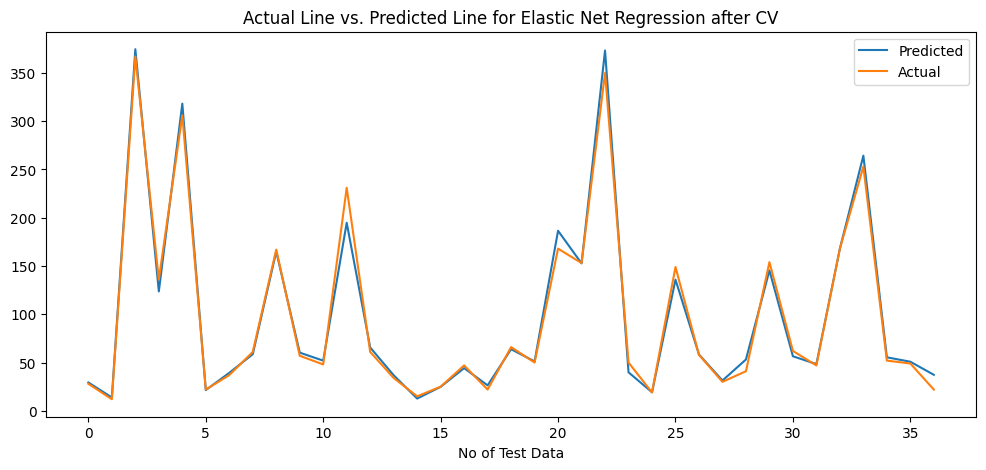

In [ ]:
#actual-predicted values plot
plt.figure(figsize=(12,5)) # set figure size
plt.plot(ElasticNet_pred)          # plot predicted value
plt.plot(np.array(Y_test))  # plot actual value
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data') #set X-axis lable
plt.title('Actual Line vs. Predicted Line for Elastic Net Regression after CV') #set plot title
plt.show() # display figure

### 3. What can you say about the model's performance?

After cross-validation, the ElasticNet regression model demonstrated significant improvement in performance. The post-cross-validation ElasticNet regression model showed a substantial decrease in Mean Absolute Error (MAE) from 51.1351 to 6.295, a significant decrease in Mean Squared Error (MSE) from 3728.1351 to 96.5128, and a substantial decrease in Root Mean Squared Error (RMSE) from 61.0585 to 9.8241. Additionally, the R-squared (R2) score increased from 0.5876 to 0.9893, and the Adjusted R-squared score increased from 0.5361 to 0.9880.

In conclusion, the ElasticNet regression model exhibited a remarkable improvement in performance after cross-validation. It had substantially lower errors and significantly higher goodness-of-fit (R2 and Adjusted R2) values, indicating that the model generalizes much better and is vastly more robust in making predictions on new data after the cross-validation process.

## **Choosing the Appropiate Model for Regression**

In [ ]:
# Initialize lists to store metric names and values
metric_names = ['MAE', 'MSE', 'RMSE', 'R2_score']
metric_values_list = []

# Initialize index names for each set of predicted values
index_names = ['Linear regression', 'ridge regression', 'Ridge regression', 'lasso regression', 'Lasso regression', 'elasticnet regression', 'ElasticNet regression']

# Loop through each set of predicted values
for pred_values in [y_pred, ridge_pred, Ridg_pred, lasso_pred, Lasso_pred, elasticnet_pred, ElasticNet_pred]:
    metrics = {
        'MAE': round(mean_absolute_error(Y_test, pred_values), 4),
        'MSE': round(mean_squared_error(Y_test, pred_values), 4),
        'RMSE': round(np.sqrt(mean_squared_error(Y_test, pred_values)), 4),
        'R2_score': round(r2_score(Y_test, pred_values), 4),
        'Adjusted_r2_score' : round(1-(1-r2_score(Y_test, pred_values))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)), 4)
         }
    metric_values_list.append(metrics)

# Create a DataFrame from the list of metric dictionaries
metrics_df = pd.DataFrame(metric_values_list,index=index_names)


In [ ]:
# show the dataset
metrics_df

,MAE,MSE,RMSE,R2_score,Adjusted_r2_score
Linear regression,6.4660,108.5532,10.4189,0.9880,0.9865
ridge regression,7.4496,177.5783,13.3258,0.9804,0.9779
Ridge regression,6.2734,122.2454,11.0565,0.9865,0.9848
lasso regression,6.9140,111.0993,10.5404,0.9877,0.9862
Lasso regression,6.0210,92.2009,9.6021,0.9898,0.9885
elasticnet regression,51.1351,3728.1351,61.0585,0.5877,0.5361
ElasticNet regression,6.2950,96.5128,9.8241,0.9893,0.9880


In [ ]:
#sorting metrics
metrics_df.sort_values(by=['R2_score'],ascending=False,inplace=True)

In [ ]:
# show the dataset
metrics_df

,MAE,MSE,RMSE,R2_score,Adjusted_r2_score
Lasso regression,6.0210,92.2009,9.6021,0.9898,0.9885
ElasticNet regression,6.2950,96.5128,9.8241,0.9893,0.9880
Linear regression,6.4660,108.5532,10.4189,0.9880,0.9865
lasso regression,6.9140,111.0993,10.5404,0.9877,0.9862
Ridge regression,6.2734,122.2454,11.0565,0.9865,0.9848
ridge regression,7.4496,177.5783,13.3258,0.9804,0.9779
elasticnet regression,51.1351,3728.1351,61.0585,0.5877,0.5361
